# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: insurance.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('insurance.csv')
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check Null

In [2]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Exploration

male      676
female    662
Name: sex, dtype: int64


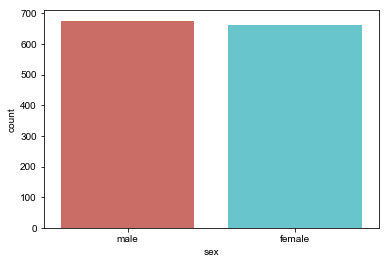

In [3]:
print(data['sex'].value_counts())

sns.countplot(x='sex',data = data, palette='hls',order = data['sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


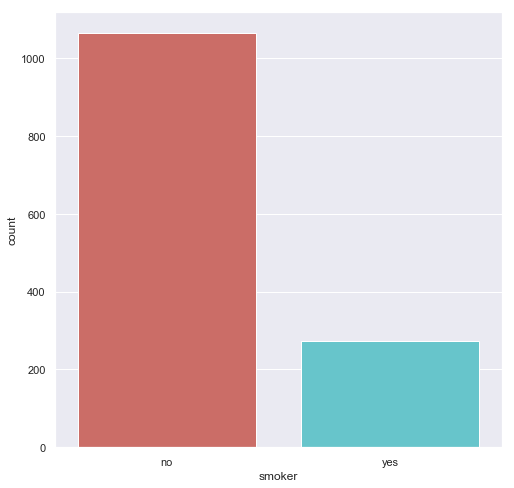

In [4]:
print(data['smoker'].value_counts())

sns.countplot(x='smoker',data = data, palette='hls',order = data['smoker'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


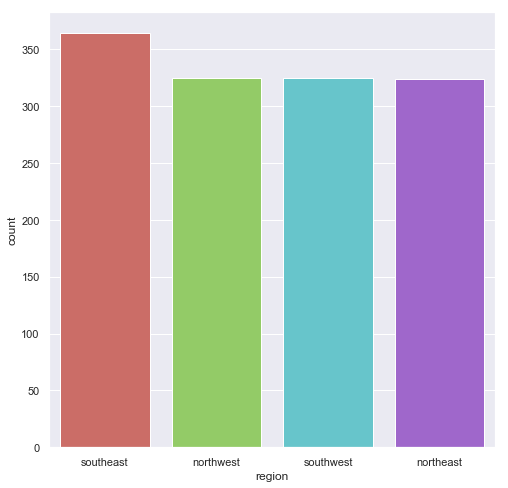

In [5]:
print(data['region'].value_counts())

sns.countplot(x='region',data = data, palette='hls',order = data['region'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [6]:
data["sex"] = data["sex"].astype('category')
data["sex*"] = data["sex"].cat.codes  

data["smoker"] = data["smoker"].astype('category')
data["smoker*"] = data["smoker"].cat.codes  

data["region"] = data["region"].astype('category')
data["region*"] = data["region"].cat.codes  

data.head()

,age,sex,bmi,children,smoker,region,charges,sex*,smoker*,region*
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


## Correlation

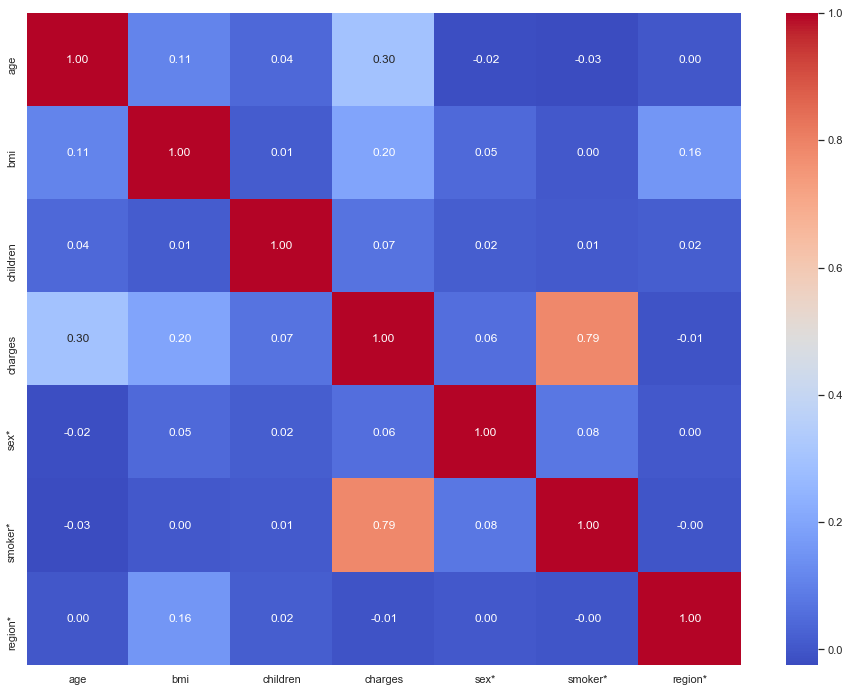

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [8]:
corr_rank = data.corr()
corr_rank["charges"].sort_values(ascending=False)

charges     1.000000
smoker*     0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex*        0.057292
region*    -0.006208
Name: charges, dtype: float64

## Data Processing and Selection

In [9]:
X = data[['smoker*','age','bmi','children','sex*','region*']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1338, 6)


array([[ 1.  , 19.  , 27.9 ,  0.  ,  0.  ,  3.  ],
       [ 0.  , 18.  , 33.77,  1.  ,  1.  ,  2.  ]])

In [10]:
y = data[['charges']].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1338, 1)


array([[16884.924  ],
       [ 1725.5523 ],
       [ 4449.462  ],
       [21984.47061],
       [ 3866.8552 ]])

## Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1338, 6)


array([[ 1.97058663, -1.43876426, -0.45332   , -0.90861367, -1.0105187 ,
         1.34390459],
       [-0.5074631 , -1.50996545,  0.5096211 , -0.07876719,  0.98959079,
         0.43849455]])

## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (1070, 6) (1070, 1)
X TEST Set :  (268, 6) (268, 1)


## Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R-Square               : 0.8576
Mean Absolute Error    : 2592.2804
Mean Squared Error     : 21252863.6986
Root Mean Squared Error: 4610.0828
Accuracy score         : 0.8576


## Data Prediction

In [15]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,age,sex,bmi,children,smoker,region,charges,sex*,smoker*,region*
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
4,32,male,28.88,0,no,northwest,3866.8552,1,0,1


In [16]:
Xp = df_pred[['smoker*','age','bmi','children','sex*','region*']].values
Xp = scaler.transform(Xp)

yp = df_pred[['charges']].values

## Prediction using RF Regressor

In [17]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([16976.9278533 ,  4092.52333245])